In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy import cluster
%matplotlib inline

In [2]:
#读取文件
df = pd.read_csv('species_annotation.txt',sep='\t',index_col=0)
df

,top_taxonomy_name,distance,pvalue,matching,full_taxonomy,taxonomic_subspecies,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,...,taxonomic_parvorder,taxonomic_varietas,taxonomic_infraorder,taxonomic_species subgroup,taxonomic_superorder,taxonomic_superfamily,taxonomic_species group,taxonomic_subtribe,taxonomic_subgenus,taxonomic_subfamily
sample,,,,,,,,,,,,,,,,,,,,,
bin_concoct.111,Alloscardovia omnicolens F0580,0.013482,0.000000e+00,270/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_concoct.111,Alloscardovia omnicolens DSM 21503,0.013900,0.000000e+00,267/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_concoct.111,Nomascus leucogenys,0.220090,5.272220e-07,6/400,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,NaN,Nomascus leucogenys,Nomascus,Hylobatidae,Primates,...,Catarrhini,NaN,Simiiformes,NaN,Euarchontoglires,Hominoidea,NaN,NaN,NaN,NaN
bin_concoct.111,Gardnerella vaginalis 1500E,0.220090,1.109830e-09,6/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Gardnerella vaginalis,Gardnerella,Bifidobacteriaceae,Bifidobacteriales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_concoct.111,Vibrio vulnificus MO6-24/O,0.220090,4.699090e-08,6/400,Bacteria; Proteobacteria; Gammaproteobacteria;...,NaN,Vibrio vulnificus,Vibrio,Vibrionaceae,Vibrionales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bin_metabat.71,Porphyromonas catoniae ATCC 51270,0.035823,0.000000e+00,157/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_metabat.71,Porphyromonas catoniae F0037,0.039432,0.000000e+00,145/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_metabat.71,Hyphomonas chukchiensis,0.245123,4.330890e-06,4/400,Bacteria; Proteobacteria; Alphaproteobacteria;...,NaN,Hyphomonas chukchiensis,Hyphomonas,Hyphomonadaceae,Rhodobacterales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#df以top_taxonomy_name列为索引
df = df.set_index('top_taxonomy_name')
df

,distance,pvalue,matching,full_taxonomy,taxonomic_subspecies,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,...,taxonomic_parvorder,taxonomic_varietas,taxonomic_infraorder,taxonomic_species subgroup,taxonomic_superorder,taxonomic_superfamily,taxonomic_species group,taxonomic_subtribe,taxonomic_subgenus,taxonomic_subfamily
top_taxonomy_name,,,,,,,,,,,,,,,,,,,,,
Alloscardovia omnicolens F0580,0.013482,0.000000e+00,270/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alloscardovia omnicolens DSM 21503,0.013900,0.000000e+00,267/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nomascus leucogenys,0.220090,5.272220e-07,6/400,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,NaN,Nomascus leucogenys,Nomascus,Hylobatidae,Primates,Mammalia,...,Catarrhini,NaN,Simiiformes,NaN,Euarchontoglires,Hominoidea,NaN,NaN,NaN,NaN
Gardnerella vaginalis 1500E,0.220090,1.109830e-09,6/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Gardnerella vaginalis,Gardnerella,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vibrio vulnificus MO6-24/O,0.220090,4.699090e-08,6/400,Bacteria; Proteobacteria; Gammaproteobacteria;...,NaN,Vibrio vulnificus,Vibrio,Vibrionaceae,Vibrionales,Gammaproteobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Porphyromonas catoniae ATCC 51270,0.035823,0.000000e+00,157/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Porphyromonas catoniae F0037,0.039432,0.000000e+00,145/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hyphomonas chukchiensis,0.245123,4.330890e-06,4/400,Bacteria; Proteobacteria; Alphaproteobacteria;...,NaN,Hyphomonas chukchiensis,Hyphomonas,Hyphomonadaceae,Rhodobacterales,Alphaproteobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#列出df的列名
df.columns

Index(['distance', 'pvalue', 'matching', 'full_taxonomy',
       'taxonomic_subspecies', 'taxonomic_species', 'taxonomic_genus',
       'taxonomic_family', 'taxonomic_order', 'taxonomic_class',
       'taxonomic_phylum', 'taxonomic_kingdom', 'taxonomic_superkingdom',
       'subspecies', 'serovar', 'plasmid', 'bioproject', 'biosample', 'taxid',
       'assembly_accession', 'match_id', 'taxonomic_subphylum',
       'taxonomic_subclass', 'taxonomic_tribe', 'taxonomic_subkingdom',
       'taxonomic_suborder', 'taxonomic_parvorder', 'taxonomic_varietas',
       'taxonomic_infraorder', 'taxonomic_species subgroup',
       'taxonomic_superorder', 'taxonomic_superfamily',
       'taxonomic_species group', 'taxonomic_subtribe', 'taxonomic_subgenus',
       'taxonomic_subfamily'],
      dtype='object')

In [5]:
#提取df的'taxonomic_species', 'taxonomic_genus','taxonomic_family', 'taxonomic_order', 'taxonomic_class','taxonomic_phylum'列
df1 = df[['taxonomic_species', 'taxonomic_genus','taxonomic_family', 'taxonomic_order', 'taxonomic_class','taxonomic_phylum']]
df1

,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,taxonomic_phylum
top_taxonomy_name,,,,,,
Alloscardovia omnicolens F0580,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,Actinobacteria
Alloscardovia omnicolens DSM 21503,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,Actinobacteria
Nomascus leucogenys,Nomascus leucogenys,Nomascus,Hylobatidae,Primates,Mammalia,Chordata
Gardnerella vaginalis 1500E,Gardnerella vaginalis,Gardnerella,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,Actinobacteria
Vibrio vulnificus MO6-24/O,Vibrio vulnificus,Vibrio,Vibrionaceae,Vibrionales,Gammaproteobacteria,Proteobacteria
...,...,...,...,...,...,...
Porphyromonas catoniae ATCC 51270,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes
Porphyromonas catoniae F0037,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes
Hyphomonas chukchiensis,Hyphomonas chukchiensis,Hyphomonas,Hyphomonadaceae,Rhodobacterales,Alphaproteobacteria,Proteobacteria


In [6]:
data = pd.read_csv('newples2.txt',sep='\t',index_col=0)
data

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre
groups,,,,,,,,,,,,,,
Bacillus cereus BAG2X1-3,4.042226,32.677411,0.000000,0.000000,0.000501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fusobacterium nucleatum subsp. animalis 7_1,0.638463,0.030334,0.051990,0.038786,1.344056,0.086259,0.000000,0.111361,0.016038,0.026896,0.000000,0.000000,0.000000,0.032828
Actinomyces dentalis DSM 19115,0.003712,0.000000,0.000000,0.232150,0.004907,0.058063,0.030914,0.942614,0.000000,0.000000,0.018150,0.723313,0.000000,7.276823
Comamonadaceae bacterium A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.221492
Capnocytophaga ochracea F0287,0.075325,0.329979,0.000000,0.140356,0.015108,0.167883,0.000000,0.199193,0.000000,0.201194,0.000000,0.000000,0.000000,0.177756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Arcobacter butzleri ED-1,0.193216,0.080083,1.939759,0.424290,0.216507,0.025222,0.029105,0.422254,0.012426,0.280935,0.000000,0.000000,0.058328,0.333574
Gemella morbillorum M424,0.305752,0.196224,0.000000,0.031668,0.298741,0.562199,0.612423,1.568907,0.133896,0.366383,0.307443,0.177337,1.654459,0.735955
Streptococcus australis ATCC 700641,1.282748,0.098981,0.136933,0.072197,0.000000,0.000000,36.778263,1.028270,0.000000,0.000000,1.969677,0.274663,0.571681,8.231987


In [7]:
#data删除最后一行
dataa = data.drop(data.index[-1])
dataa

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre
groups,,,,,,,,,,,,,,
Bacillus cereus BAG2X1-3,4.042226,32.677411,0.000000,0.000000,0.000501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fusobacterium nucleatum subsp. animalis 7_1,0.638463,0.030334,0.051990,0.038786,1.344056,0.086259,0.000000,0.111361,0.016038,0.026896,0.000000,0.000000,0.000000,0.032828
Actinomyces dentalis DSM 19115,0.003712,0.000000,0.000000,0.232150,0.004907,0.058063,0.030914,0.942614,0.000000,0.000000,0.018150,0.723313,0.000000,7.276823
Comamonadaceae bacterium A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.221492
Capnocytophaga ochracea F0287,0.075325,0.329979,0.000000,0.140356,0.015108,0.167883,0.000000,0.199193,0.000000,0.201194,0.000000,0.000000,0.000000,0.177756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veillonella sp. 3_1_44,4.077179,2.073833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arcobacter butzleri ED-1,0.193216,0.080083,1.939759,0.424290,0.216507,0.025222,0.029105,0.422254,0.012426,0.280935,0.000000,0.000000,0.058328,0.333574
Gemella morbillorum M424,0.305752,0.196224,0.000000,0.031668,0.298741,0.562199,0.612423,1.568907,0.133896,0.366383,0.307443,0.177337,1.654459,0.735955


In [8]:
# 计算每个样本的总丰度  
total_abundance = dataa.sum(axis=0)  

# 计算相对丰度  
data1 = dataa.div(total_abundance, axis=1)
data1

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre
groups,,,,,,,,,,,,,,
Bacillus cereus BAG2X1-3,0.026776,0.281768,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fusobacterium nucleatum subsp. animalis 7_1,0.004229,0.000262,0.000567,0.000892,0.006718,0.001597,0.000000,0.000583,0.000108,0.000376,0.000000,0.000000,0.000000,0.000296
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573
Comamonadaceae bacterium A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020018
Capnocytophaga ochracea F0287,0.000499,0.002845,0.000000,0.003228,0.000076,0.003108,0.000000,0.001043,0.000000,0.002816,0.000000,0.000000,0.000000,0.001602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veillonella sp. 3_1_44,0.027008,0.017882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arcobacter butzleri ED-1,0.001280,0.000691,0.021145,0.009758,0.001082,0.000467,0.000181,0.002212,0.000084,0.003932,0.000000,0.000000,0.000234,0.003006
Gemella morbillorum M424,0.002025,0.001692,0.000000,0.000728,0.001493,0.010409,0.003807,0.008218,0.000905,0.005128,0.000500,0.002870,0.006642,0.006632


In [9]:
#将data和df以索引为标准合并，取交集
dataf = pd.merge(data1,df1,left_index=True,right_index=True)
dataf

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,taxonomic_phylum
Acidovorax sp. MR-S7,0.000266,0.003129,0.000000,0.001692,0.000000,0.005346,0.000061,0.000000,0.000079,0.008032,0.000000,0.000000,0.000000,0.009702,Acidovorax sp. MR-S7,Acidovorax,Comamonadaceae,Burkholderiales,Betaproteobacteria,Proteobacteria
Acidovorax sp. MR-S7,0.000266,0.003129,0.000000,0.001692,0.000000,0.005346,0.000061,0.000000,0.000079,0.008032,0.000000,0.000000,0.000000,0.009702,Acidovorax sp. MR-S7,Acidovorax,Comamonadaceae,Burkholderiales,Betaproteobacteria,Proteobacteria
Acinetobacter sp. 1578804,0.002766,0.000908,0.000738,0.000532,0.002212,0.003437,0.000000,0.000000,0.002069,0.012538,0.000000,0.001411,0.000000,0.001305,Acinetobacter sp. 1578804,Acinetobacter,Moraxellaceae,Pseudomonadales,Gammaproteobacteria,Proteobacteria
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veillonella sp. 3_1_44,0.027008,0.017882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Veillonella sp. 3_1_44,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes


In [10]:
#dataf重复的行只取第一个行
dataf0 = dataf.drop_duplicates()
dataf0

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,taxonomic_phylum
Acidovorax sp. MR-S7,0.000266,0.003129,0.000000,0.001692,0.000000,0.005346,0.000061,0.000000,0.000079,0.008032,0.000000,0.000000,0.000000,0.009702,Acidovorax sp. MR-S7,Acidovorax,Comamonadaceae,Burkholderiales,Betaproteobacteria,Proteobacteria
Acinetobacter sp. 1578804,0.002766,0.000908,0.000738,0.000532,0.002212,0.003437,0.000000,0.000000,0.002069,0.012538,0.000000,0.001411,0.000000,0.001305,Acinetobacter sp. 1578804,Acinetobacter,Moraxellaceae,Pseudomonadales,Gammaproteobacteria,Proteobacteria
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
Actinomyces dentalis DSM 19115,0.000656,0.000326,0.000000,0.007578,0.000271,0.010925,0.000077,0.004216,0.000000,0.000000,0.000157,0.031777,0.000000,0.011141,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
Actinomyces sp. ICM47,0.010164,0.025993,0.001300,0.009780,0.014678,0.129033,0.000000,0.000719,0.000826,0.005167,0.000226,0.001578,0.000000,0.000352,Actinomyces sp. ICM47,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Streptomyces griseorubens,0.000286,0.005394,0.000154,0.005589,0.000485,0.042350,0.000000,0.002332,0.000000,0.004618,0.000000,0.003761,0.000000,0.001960,Streptomyces griseorubens,Streptomyces,Streptomycetaceae,Streptomycetales,Actinobacteria,Actinobacteria
Tyzzerella nexilis DSM 1787,0.034854,0.020114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001963,Tyzzerella nexilis,Tyzzerella,Lachnospiraceae,Clostridiales,Clostridia,Firmicutes
Veillonella sp. 3_1_44,0.027008,0.017882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Veillonella sp. 3_1_44,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes


In [11]:
#列出dataf0的列名
dataf0.columns

Index(['HC-1-post', 'HC-1-pre', 'HC-2-post', 'HC-2-pre', 'HC-3-post',
       'HC-3-pre', 'OSCC-1-post', 'OSCC-1-pre', 'OSCC-2-post', 'OSCC-2-pre',
       'OSCC-3-post', 'OSCC-3-pre', 'OSCC-4-post', 'OSCC-4-pre',
       'taxonomic_species', 'taxonomic_genus', 'taxonomic_family',
       'taxonomic_order', 'taxonomic_class', 'taxonomic_phylum'],
      dtype='object')

In [12]:
#dataf1保存为txt文件
dataf0.to_csv('dataf1.txt',sep='\t')

In [13]:
dataf1=dataf0[['taxonomic_order', 'HC-1-pre', 'HC-2-pre','HC-3-pre','HC-1-post','HC-2-post',  'HC-3-post',
         'OSCC-1-pre',  'OSCC-2-pre','OSCC-3-pre','OSCC-4-pre',
       'OSCC-1-post','OSCC-2-post','OSCC-3-post',  'OSCC-4-post', ]]
dataf1

,taxonomic_order,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post
Acidovorax sp. MR-S7,Burkholderiales,0.003129,0.001692,0.005346,0.000266,0.000000,0.000000,0.000000,0.008032,0.000000,0.009702,0.000061,0.000079,0.000000,0.000000
Acinetobacter sp. 1578804,Pseudomonadales,0.000908,0.000532,0.003437,0.002766,0.000738,0.002212,0.000000,0.012538,0.001411,0.001305,0.000000,0.002069,0.000000,0.000000
Actinomyces dentalis DSM 19115,Actinomycetales,0.000000,0.005339,0.001075,0.000025,0.000000,0.000025,0.004937,0.000000,0.011706,0.065573,0.000192,0.000000,0.000029,0.000000
Actinomyces dentalis DSM 19115,Actinomycetales,0.000326,0.007578,0.010925,0.000656,0.000000,0.000271,0.004216,0.000000,0.031777,0.011141,0.000077,0.000000,0.000157,0.000000
Actinomyces sp. ICM47,Actinomycetales,0.025993,0.009780,0.129033,0.010164,0.001300,0.014678,0.000719,0.005167,0.001578,0.000352,0.000000,0.000826,0.000226,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Streptomyces griseorubens,Streptomycetales,0.005394,0.005589,0.042350,0.000286,0.000154,0.000485,0.002332,0.004618,0.003761,0.001960,0.000000,0.000000,0.000000,0.000000
Tyzzerella nexilis DSM 1787,Clostridiales,0.020114,0.000000,0.000000,0.034854,0.000000,0.000000,0.000000,0.000000,0.000000,0.001963,0.000000,0.000000,0.000000,0.000000
Veillonella sp. 3_1_44,Veillonellales,0.017882,0.000000,0.000000,0.027008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Veillonella sp. 6_1_27,Veillonellales,0.001250,0.013667,0.008315,0.002326,0.019633,0.007102,0.004110,0.001141,0.087272,0.005661,0.000699,0.006562,0.175269,0.012815


In [14]:
#dataf1中Phylum列中相同的值合并
dataf2=dataf1.groupby('taxonomic_order').sum()
dataf2

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post
taxonomic_order,,,,,,,,,,,,,,
Actinomycetales,0.027476,0.054250,0.168549,0.012657,0.004392,0.017774,0.010314,0.010391,0.077446,0.082634,0.000355,0.000854,0.007486,0.000000
Bacillales,0.350349,0.040110,0.070350,0.100065,0.012398,0.013448,0.069223,0.051084,0.063435,0.036016,0.015938,0.001640,0.000779,0.014907
Bacteroidales,0.188568,0.279799,0.328072,0.211179,0.166966,0.185555,0.095170,0.437192,0.497399,0.265207,0.014593,0.042807,0.000170,0.004893
Bifidobacteriales,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000589,0.017837,0.000000,0.005595,0.000000
Burkholderiales,0.008363,0.002929,0.014719,0.010716,0.000000,0.000298,0.000000,0.010592,0.000000,0.030029,0.000166,0.001046,0.000000,0.000000
Campylobacterales,0.012618,0.043417,0.029508,0.007421,0.024309,0.005654,0.012243,0.063312,0.006752,0.161954,0.000808,0.000758,0.000000,0.000255
Clostridiales,0.113033,0.104094,0.136114,0.337046,0.434815,0.651505,0.022991,0.075613,0.094571,0.080385,0.065007,0.153188,0.002134,0.008654
Corynebacteriales,0.004729,0.027737,0.021087,0.001234,0.000406,0.000323,0.000000,0.000000,0.000000,0.003274,0.000000,0.000000,0.000000,0.000000
Desulfobacterales,0.004781,0.002912,0.001268,0.015743,0.000970,0.000851,0.003080,0.000000,0.000000,0.002768,0.000000,0.000000,0.000000,0.000000


In [15]:
#在最右侧新建sum列，计算每行的和
dataf2['sum'] = dataf2.apply(lambda x: x.sum(), axis=1)
dataf2

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post,sum
taxonomic_order,,,,,,,,,,,,,,,
Actinomycetales,0.027476,0.054250,0.168549,0.012657,0.004392,0.017774,0.010314,0.010391,0.077446,0.082634,0.000355,0.000854,0.007486,0.000000,0.474577
Bacillales,0.350349,0.040110,0.070350,0.100065,0.012398,0.013448,0.069223,0.051084,0.063435,0.036016,0.015938,0.001640,0.000779,0.014907,0.839742
Bacteroidales,0.188568,0.279799,0.328072,0.211179,0.166966,0.185555,0.095170,0.437192,0.497399,0.265207,0.014593,0.042807,0.000170,0.004893,2.717568
Bifidobacteriales,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000589,0.017837,0.000000,0.005595,0.000000,0.024021
Burkholderiales,0.008363,0.002929,0.014719,0.010716,0.000000,0.000298,0.000000,0.010592,0.000000,0.030029,0.000166,0.001046,0.000000,0.000000,0.078857
Campylobacterales,0.012618,0.043417,0.029508,0.007421,0.024309,0.005654,0.012243,0.063312,0.006752,0.161954,0.000808,0.000758,0.000000,0.000255,0.369009
Clostridiales,0.113033,0.104094,0.136114,0.337046,0.434815,0.651505,0.022991,0.075613,0.094571,0.080385,0.065007,0.153188,0.002134,0.008654,2.279149
Corynebacteriales,0.004729,0.027737,0.021087,0.001234,0.000406,0.000323,0.000000,0.000000,0.000000,0.003274,0.000000,0.000000,0.000000,0.000000,0.058792
Desulfobacterales,0.004781,0.002912,0.001268,0.015743,0.000970,0.000851,0.003080,0.000000,0.000000,0.002768,0.000000,0.000000,0.000000,0.000000,0.032373


In [16]:
#da2根据sum列排列
dataf3=dataf2.sort_values(by='sum',ascending=False)
dataf3

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post,sum
taxonomic_order,,,,,,,,,,,,,,,
Bacteroidales,0.188568,0.279799,0.328072,0.211179,0.166966,0.185555,0.095170,0.437192,0.497399,0.265207,0.014593,0.042807,0.000170,0.004893,2.717568
Enterobacterales,0.000064,0.000514,0.000000,0.004364,0.111727,0.004407,0.000011,0.000000,0.000000,0.000052,0.633081,0.468639,0.596503,0.839291,2.658650
Clostridiales,0.113033,0.104094,0.136114,0.337046,0.434815,0.651505,0.022991,0.075613,0.094571,0.080385,0.065007,0.153188,0.002134,0.008654,2.279149
Neisseriales,0.098072,0.120405,0.033543,0.011729,0.001179,0.000214,0.659196,0.020022,0.003250,0.037770,0.014688,0.000764,0.000000,0.000245,1.001077
Lactobacillales,0.015942,0.001660,0.003557,0.059770,0.004275,0.011436,0.013434,0.007225,0.018990,0.074600,0.230566,0.199767,0.211079,0.117688,0.969987
Bacillales,0.350349,0.040110,0.070350,0.100065,0.012398,0.013448,0.069223,0.051084,0.063435,0.036016,0.015938,0.001640,0.000779,0.014907,0.839742
Veillonellales,0.038710,0.073952,0.020732,0.097164,0.074115,0.047463,0.006483,0.051837,0.114784,0.022198,0.001330,0.063874,0.175294,0.013508,0.801443
Actinomycetales,0.027476,0.054250,0.168549,0.012657,0.004392,0.017774,0.010314,0.010391,0.077446,0.082634,0.000355,0.000854,0.007486,0.000000,0.474577
Campylobacterales,0.012618,0.043417,0.029508,0.007421,0.024309,0.005654,0.012243,0.063312,0.006752,0.161954,0.000808,0.000758,0.000000,0.000255,0.369009


In [17]:
#da3删除sum列
dataf4 = dataf3.drop(['sum'],axis=1)
dataf4

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post
taxonomic_order,,,,,,,,,,,,,,
Bacteroidales,0.188568,0.279799,0.328072,0.211179,0.166966,0.185555,0.095170,0.437192,0.497399,0.265207,0.014593,0.042807,0.000170,0.004893
Enterobacterales,0.000064,0.000514,0.000000,0.004364,0.111727,0.004407,0.000011,0.000000,0.000000,0.000052,0.633081,0.468639,0.596503,0.839291
Clostridiales,0.113033,0.104094,0.136114,0.337046,0.434815,0.651505,0.022991,0.075613,0.094571,0.080385,0.065007,0.153188,0.002134,0.008654
Neisseriales,0.098072,0.120405,0.033543,0.011729,0.001179,0.000214,0.659196,0.020022,0.003250,0.037770,0.014688,0.000764,0.000000,0.000245
Lactobacillales,0.015942,0.001660,0.003557,0.059770,0.004275,0.011436,0.013434,0.007225,0.018990,0.074600,0.230566,0.199767,0.211079,0.117688
Bacillales,0.350349,0.040110,0.070350,0.100065,0.012398,0.013448,0.069223,0.051084,0.063435,0.036016,0.015938,0.001640,0.000779,0.014907
Veillonellales,0.038710,0.073952,0.020732,0.097164,0.074115,0.047463,0.006483,0.051837,0.114784,0.022198,0.001330,0.063874,0.175294,0.013508
Actinomycetales,0.027476,0.054250,0.168549,0.012657,0.004392,0.017774,0.010314,0.010391,0.077446,0.082634,0.000355,0.000854,0.007486,0.000000
Campylobacterales,0.012618,0.043417,0.029508,0.007421,0.024309,0.005654,0.012243,0.063312,0.006752,0.161954,0.000808,0.000758,0.000000,0.000255


In [18]:
dataf5 = pd.DataFrame(dataf4.values.T,columns = dataf4.index,index = dataf4.columns) 
dataf5

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,...,Burkholderiales,Micrococcales,Streptomycetales,Corynebacteriales,Eggerthellales,Pasteurellales,Propionibacteriales,Eucoccidiorida,Desulfobacterales,Bifidobacteriales
HC-1-pre,0.188568,0.000064,0.113033,0.098072,0.015942,0.350349,0.038710,0.027476,0.012618,0.024162,...,0.008363,0.015147,0.005394,0.004729,0.000487,0.018299,0.001084,0.000000,0.004781,0.000000
HC-2-pre,0.279799,0.000514,0.104094,0.120405,0.001660,0.040110,0.073952,0.054250,0.043417,0.029577,...,0.002929,0.041672,0.005589,0.027737,0.000880,0.011328,0.009476,0.012684,0.002912,0.000000
HC-3-pre,0.328072,0.000000,0.136114,0.033543,0.003557,0.070350,0.020732,0.168549,0.029508,0.023310,...,0.014719,0.008230,0.042350,0.021087,0.000547,0.003579,0.019258,0.000000,0.001268,0.000000
HC-1-post,0.211179,0.004364,0.337046,0.011729,0.059770,0.100065,0.097164,0.012657,0.007421,0.005330,...,0.010716,0.002219,0.000286,0.001234,0.016909,0.009085,0.000367,0.000043,0.015743,0.000000
HC-2-post,0.166966,0.111727,0.434815,0.001179,0.004275,0.012398,0.074115,0.004392,0.024309,0.000842,...,0.000000,0.000699,0.000154,0.000406,0.004527,0.000895,0.000158,0.006567,0.000970,0.000000
HC-3-post,0.185555,0.004407,0.651505,0.000214,0.011436,0.013448,0.047463,0.017774,0.005654,0.000619,...,0.000298,0.000113,0.000485,0.000323,0.007321,0.000472,0.000446,0.000000,0.000851,0.000000
OSCC-1-pre,0.095170,0.000011,0.022991,0.659196,0.013434,0.069223,0.006483,0.010314,0.012243,0.041060,...,0.000000,0.000405,0.002332,0.000000,0.000110,0.000000,0.001594,0.000746,0.003080,0.000000
OSCC-2-pre,0.437192,0.000000,0.075613,0.020022,0.007225,0.051084,0.051837,0.010391,0.063312,0.067898,...,0.010592,0.002986,0.004618,0.000000,0.000620,0.000000,0.000741,0.005208,0.000000,0.000000
OSCC-3-pre,0.497399,0.000000,0.094571,0.003250,0.018990,0.063435,0.114784,0.077446,0.006752,0.016784,...,0.000000,0.001227,0.003761,0.000000,0.015739,0.003632,0.000000,0.000000,0.000000,0.000000
OSCC-4-pre,0.265207,0.000052,0.080385,0.037770,0.074600,0.036016,0.022198,0.082634,0.161954,0.085161,...,0.030029,0.003276,0.001960,0.003274,0.001328,0.000989,0.007833,0.009824,0.002768,0.000589


In [19]:
#da5计算每一列的和，成为新的行sum
dataf5.loc['sum'] = dataf5.apply(lambda x: x.sum())
dataf5

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,...,Burkholderiales,Micrococcales,Streptomycetales,Corynebacteriales,Eggerthellales,Pasteurellales,Propionibacteriales,Eucoccidiorida,Desulfobacterales,Bifidobacteriales
HC-1-pre,0.188568,0.000064,0.113033,0.098072,0.015942,0.350349,0.038710,0.027476,0.012618,0.024162,...,0.008363,0.015147,0.005394,0.004729,0.000487,0.018299,0.001084,0.000000,0.004781,0.000000
HC-2-pre,0.279799,0.000514,0.104094,0.120405,0.001660,0.040110,0.073952,0.054250,0.043417,0.029577,...,0.002929,0.041672,0.005589,0.027737,0.000880,0.011328,0.009476,0.012684,0.002912,0.000000
HC-3-pre,0.328072,0.000000,0.136114,0.033543,0.003557,0.070350,0.020732,0.168549,0.029508,0.023310,...,0.014719,0.008230,0.042350,0.021087,0.000547,0.003579,0.019258,0.000000,0.001268,0.000000
HC-1-post,0.211179,0.004364,0.337046,0.011729,0.059770,0.100065,0.097164,0.012657,0.007421,0.005330,...,0.010716,0.002219,0.000286,0.001234,0.016909,0.009085,0.000367,0.000043,0.015743,0.000000
HC-2-post,0.166966,0.111727,0.434815,0.001179,0.004275,0.012398,0.074115,0.004392,0.024309,0.000842,...,0.000000,0.000699,0.000154,0.000406,0.004527,0.000895,0.000158,0.006567,0.000970,0.000000
HC-3-post,0.185555,0.004407,0.651505,0.000214,0.011436,0.013448,0.047463,0.017774,0.005654,0.000619,...,0.000298,0.000113,0.000485,0.000323,0.007321,0.000472,0.000446,0.000000,0.000851,0.000000
OSCC-1-pre,0.095170,0.000011,0.022991,0.659196,0.013434,0.069223,0.006483,0.010314,0.012243,0.041060,...,0.000000,0.000405,0.002332,0.000000,0.000110,0.000000,0.001594,0.000746,0.003080,0.000000
OSCC-2-pre,0.437192,0.000000,0.075613,0.020022,0.007225,0.051084,0.051837,0.010391,0.063312,0.067898,...,0.010592,0.002986,0.004618,0.000000,0.000620,0.000000,0.000741,0.005208,0.000000,0.000000
OSCC-3-pre,0.497399,0.000000,0.094571,0.003250,0.018990,0.063435,0.114784,0.077446,0.006752,0.016784,...,0.000000,0.001227,0.003761,0.000000,0.015739,0.003632,0.000000,0.000000,0.000000,0.000000
OSCC-4-pre,0.265207,0.000052,0.080385,0.037770,0.074600,0.036016,0.022198,0.082634,0.161954,0.085161,...,0.030029,0.003276,0.001960,0.003274,0.001328,0.000989,0.007833,0.009824,0.002768,0.000589


In [20]:
#提取da5中sum行小于0.2的列
dataf6 = dataf5.loc[:,dataf5.loc['sum'] > 0.15]
dataf6

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales
HC-1-pre,0.188568,0.000064,0.113033,0.098072,0.015942,0.350349,0.038710,0.027476,0.012618,0.024162,0.004640,0.006233,0.005843
HC-2-pre,0.279799,0.000514,0.104094,0.120405,0.001660,0.040110,0.073952,0.054250,0.043417,0.029577,0.038304,0.012419,0.000000
HC-3-pre,0.328072,0.000000,0.136114,0.033543,0.003557,0.070350,0.020732,0.168549,0.029508,0.023310,0.005152,0.014765,0.000000
HC-1-post,0.211179,0.004364,0.337046,0.011729,0.059770,0.100065,0.097164,0.012657,0.007421,0.005330,0.010401,0.033663,0.018682
HC-2-post,0.166966,0.111727,0.434815,0.001179,0.004275,0.012398,0.074115,0.004392,0.024309,0.000842,0.041543,0.054501,0.001437
HC-3-post,0.185555,0.004407,0.651505,0.000214,0.011436,0.013448,0.047463,0.017774,0.005654,0.000619,0.004996,0.019335,0.001764
OSCC-1-pre,0.095170,0.000011,0.022991,0.659196,0.013434,0.069223,0.006483,0.010314,0.012243,0.041060,0.000000,0.001444,0.006583
OSCC-2-pre,0.437192,0.000000,0.075613,0.020022,0.007225,0.051084,0.051837,0.010391,0.063312,0.067898,0.048880,0.017169,0.052314
OSCC-3-pre,0.497399,0.000000,0.094571,0.003250,0.018990,0.063435,0.114784,0.077446,0.006752,0.016784,0.032831,0.013352,0.017905
OSCC-4-pre,0.265207,0.000052,0.080385,0.037770,0.074600,0.036016,0.022198,0.082634,0.161954,0.085161,0.001797,0.011250,0.028487


In [21]:
#dataf6删除sum行
dataf7 = dataf6.drop(['sum'])
dataf7

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales
HC-1-pre,0.188568,0.000064,0.113033,0.098072,0.015942,0.350349,0.038710,0.027476,0.012618,0.024162,0.004640,0.006233,0.005843
HC-2-pre,0.279799,0.000514,0.104094,0.120405,0.001660,0.040110,0.073952,0.054250,0.043417,0.029577,0.038304,0.012419,0.000000
HC-3-pre,0.328072,0.000000,0.136114,0.033543,0.003557,0.070350,0.020732,0.168549,0.029508,0.023310,0.005152,0.014765,0.000000
HC-1-post,0.211179,0.004364,0.337046,0.011729,0.059770,0.100065,0.097164,0.012657,0.007421,0.005330,0.010401,0.033663,0.018682
HC-2-post,0.166966,0.111727,0.434815,0.001179,0.004275,0.012398,0.074115,0.004392,0.024309,0.000842,0.041543,0.054501,0.001437
HC-3-post,0.185555,0.004407,0.651505,0.000214,0.011436,0.013448,0.047463,0.017774,0.005654,0.000619,0.004996,0.019335,0.001764
OSCC-1-pre,0.095170,0.000011,0.022991,0.659196,0.013434,0.069223,0.006483,0.010314,0.012243,0.041060,0.000000,0.001444,0.006583
OSCC-2-pre,0.437192,0.000000,0.075613,0.020022,0.007225,0.051084,0.051837,0.010391,0.063312,0.067898,0.048880,0.017169,0.052314
OSCC-3-pre,0.497399,0.000000,0.094571,0.003250,0.018990,0.063435,0.114784,0.077446,0.006752,0.016784,0.032831,0.013352,0.017905
OSCC-4-pre,0.265207,0.000052,0.080385,0.037770,0.074600,0.036016,0.022198,0.082634,0.161954,0.085161,0.001797,0.011250,0.028487


In [22]:
#计算dataf6每一行的和，形成新的列
dataf7['sum'] = dataf7.apply(lambda x: x.sum(), axis=1)
dataf7

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,sum
HC-1-pre,0.188568,0.000064,0.113033,0.098072,0.015942,0.350349,0.038710,0.027476,0.012618,0.024162,0.004640,0.006233,0.005843,0.885710
HC-2-pre,0.279799,0.000514,0.104094,0.120405,0.001660,0.040110,0.073952,0.054250,0.043417,0.029577,0.038304,0.012419,0.000000,0.798502
HC-3-pre,0.328072,0.000000,0.136114,0.033543,0.003557,0.070350,0.020732,0.168549,0.029508,0.023310,0.005152,0.014765,0.000000,0.833651
HC-1-post,0.211179,0.004364,0.337046,0.011729,0.059770,0.100065,0.097164,0.012657,0.007421,0.005330,0.010401,0.033663,0.018682,0.909471
HC-2-post,0.166966,0.111727,0.434815,0.001179,0.004275,0.012398,0.074115,0.004392,0.024309,0.000842,0.041543,0.054501,0.001437,0.932497
HC-3-post,0.185555,0.004407,0.651505,0.000214,0.011436,0.013448,0.047463,0.017774,0.005654,0.000619,0.004996,0.019335,0.001764,0.964170
OSCC-1-pre,0.095170,0.000011,0.022991,0.659196,0.013434,0.069223,0.006483,0.010314,0.012243,0.041060,0.000000,0.001444,0.006583,0.938153
OSCC-2-pre,0.437192,0.000000,0.075613,0.020022,0.007225,0.051084,0.051837,0.010391,0.063312,0.067898,0.048880,0.017169,0.052314,0.902935
OSCC-3-pre,0.497399,0.000000,0.094571,0.003250,0.018990,0.063435,0.114784,0.077446,0.006752,0.016784,0.032831,0.013352,0.017905,0.957497
OSCC-4-pre,0.265207,0.000052,0.080385,0.037770,0.074600,0.036016,0.022198,0.082634,0.161954,0.085161,0.001797,0.011250,0.028487,0.887510


In [23]:
#da6最右侧添加新的一列Others，是1-da7的sum列
dataf6['Others'] = 1-dataf7['sum']
dataf6

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5648\1087601603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf6['Others'] = 1-dataf7['sum']


taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,Others
HC-1-pre,0.188568,0.000064,0.113033,0.098072,0.015942,0.350349,0.038710,0.027476,0.012618,0.024162,0.004640,0.006233,0.005843,0.114290
HC-2-pre,0.279799,0.000514,0.104094,0.120405,0.001660,0.040110,0.073952,0.054250,0.043417,0.029577,0.038304,0.012419,0.000000,0.201498
HC-3-pre,0.328072,0.000000,0.136114,0.033543,0.003557,0.070350,0.020732,0.168549,0.029508,0.023310,0.005152,0.014765,0.000000,0.166349
HC-1-post,0.211179,0.004364,0.337046,0.011729,0.059770,0.100065,0.097164,0.012657,0.007421,0.005330,0.010401,0.033663,0.018682,0.090529
HC-2-post,0.166966,0.111727,0.434815,0.001179,0.004275,0.012398,0.074115,0.004392,0.024309,0.000842,0.041543,0.054501,0.001437,0.067503
HC-3-post,0.185555,0.004407,0.651505,0.000214,0.011436,0.013448,0.047463,0.017774,0.005654,0.000619,0.004996,0.019335,0.001764,0.035830
OSCC-1-pre,0.095170,0.000011,0.022991,0.659196,0.013434,0.069223,0.006483,0.010314,0.012243,0.041060,0.000000,0.001444,0.006583,0.061847
OSCC-2-pre,0.437192,0.000000,0.075613,0.020022,0.007225,0.051084,0.051837,0.010391,0.063312,0.067898,0.048880,0.017169,0.052314,0.097065
OSCC-3-pre,0.497399,0.000000,0.094571,0.003250,0.018990,0.063435,0.114784,0.077446,0.006752,0.016784,0.032831,0.013352,0.017905,0.042503
OSCC-4-pre,0.265207,0.000052,0.080385,0.037770,0.074600,0.036016,0.022198,0.082634,0.161954,0.085161,0.001797,0.011250,0.028487,0.112490


In [24]:
#删除da6的sum行
dataf8 = dataf6.drop(['sum'])
dataf8

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,Others
HC-1-pre,0.188568,0.000064,0.113033,0.098072,0.015942,0.350349,0.038710,0.027476,0.012618,0.024162,0.004640,0.006233,0.005843,0.114290
HC-2-pre,0.279799,0.000514,0.104094,0.120405,0.001660,0.040110,0.073952,0.054250,0.043417,0.029577,0.038304,0.012419,0.000000,0.201498
HC-3-pre,0.328072,0.000000,0.136114,0.033543,0.003557,0.070350,0.020732,0.168549,0.029508,0.023310,0.005152,0.014765,0.000000,0.166349
HC-1-post,0.211179,0.004364,0.337046,0.011729,0.059770,0.100065,0.097164,0.012657,0.007421,0.005330,0.010401,0.033663,0.018682,0.090529
HC-2-post,0.166966,0.111727,0.434815,0.001179,0.004275,0.012398,0.074115,0.004392,0.024309,0.000842,0.041543,0.054501,0.001437,0.067503
HC-3-post,0.185555,0.004407,0.651505,0.000214,0.011436,0.013448,0.047463,0.017774,0.005654,0.000619,0.004996,0.019335,0.001764,0.035830
OSCC-1-pre,0.095170,0.000011,0.022991,0.659196,0.013434,0.069223,0.006483,0.010314,0.012243,0.041060,0.000000,0.001444,0.006583,0.061847
OSCC-2-pre,0.437192,0.000000,0.075613,0.020022,0.007225,0.051084,0.051837,0.010391,0.063312,0.067898,0.048880,0.017169,0.052314,0.097065
OSCC-3-pre,0.497399,0.000000,0.094571,0.003250,0.018990,0.063435,0.114784,0.077446,0.006752,0.016784,0.032831,0.013352,0.017905,0.042503
OSCC-4-pre,0.265207,0.000052,0.080385,0.037770,0.074600,0.036016,0.022198,0.082634,0.161954,0.085161,0.001797,0.011250,0.028487,0.112490


In [25]:
dat1=dataf8.iloc[0:3]
dat1

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,Others
HC-1-pre,0.188568,0.000064,0.113033,0.098072,0.015942,0.350349,0.038710,0.027476,0.012618,0.024162,0.004640,0.006233,0.005843,0.114290
HC-2-pre,0.279799,0.000514,0.104094,0.120405,0.001660,0.040110,0.073952,0.054250,0.043417,0.029577,0.038304,0.012419,0.000000,0.201498
HC-3-pre,0.328072,0.000000,0.136114,0.033543,0.003557,0.070350,0.020732,0.168549,0.029508,0.023310,0.005152,0.014765,0.000000,0.166349


In [26]:
#da1根据Firmicutes列的值排序
da1=dat1.sort_values(by='Bacteroidales',ascending=False)
da1

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,Others
HC-3-pre,0.328072,0.000000,0.136114,0.033543,0.003557,0.070350,0.020732,0.168549,0.029508,0.023310,0.005152,0.014765,0.000000,0.166349
HC-2-pre,0.279799,0.000514,0.104094,0.120405,0.001660,0.040110,0.073952,0.054250,0.043417,0.029577,0.038304,0.012419,0.000000,0.201498
HC-1-pre,0.188568,0.000064,0.113033,0.098072,0.015942,0.350349,0.038710,0.027476,0.012618,0.024162,0.004640,0.006233,0.005843,0.114290


In [27]:
dat2=dataf8.iloc[3:6]
dat2

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,Others
HC-1-post,0.211179,0.004364,0.337046,0.011729,0.059770,0.100065,0.097164,0.012657,0.007421,0.005330,0.010401,0.033663,0.018682,0.090529
HC-2-post,0.166966,0.111727,0.434815,0.001179,0.004275,0.012398,0.074115,0.004392,0.024309,0.000842,0.041543,0.054501,0.001437,0.067503
HC-3-post,0.185555,0.004407,0.651505,0.000214,0.011436,0.013448,0.047463,0.017774,0.005654,0.000619,0.004996,0.019335,0.001764,0.035830


In [28]:
da2=dat2.sort_values(by='Bacteroidales',ascending=False)
da2

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,Others
HC-1-post,0.211179,0.004364,0.337046,0.011729,0.059770,0.100065,0.097164,0.012657,0.007421,0.005330,0.010401,0.033663,0.018682,0.090529
HC-3-post,0.185555,0.004407,0.651505,0.000214,0.011436,0.013448,0.047463,0.017774,0.005654,0.000619,0.004996,0.019335,0.001764,0.035830
HC-2-post,0.166966,0.111727,0.434815,0.001179,0.004275,0.012398,0.074115,0.004392,0.024309,0.000842,0.041543,0.054501,0.001437,0.067503


In [29]:
dat3=dataf8.iloc[6:10]
dat3

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,Others
OSCC-1-pre,0.095170,0.000011,0.022991,0.659196,0.013434,0.069223,0.006483,0.010314,0.012243,0.041060,0.000000,0.001444,0.006583,0.061847
OSCC-2-pre,0.437192,0.000000,0.075613,0.020022,0.007225,0.051084,0.051837,0.010391,0.063312,0.067898,0.048880,0.017169,0.052314,0.097065
OSCC-3-pre,0.497399,0.000000,0.094571,0.003250,0.018990,0.063435,0.114784,0.077446,0.006752,0.016784,0.032831,0.013352,0.017905,0.042503
OSCC-4-pre,0.265207,0.000052,0.080385,0.037770,0.074600,0.036016,0.022198,0.082634,0.161954,0.085161,0.001797,0.011250,0.028487,0.112490


In [30]:
da3=dat3.sort_values(by='Bacteroidales',ascending=False)
da3

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,Others
OSCC-3-pre,0.497399,0.000000,0.094571,0.003250,0.018990,0.063435,0.114784,0.077446,0.006752,0.016784,0.032831,0.013352,0.017905,0.042503
OSCC-2-pre,0.437192,0.000000,0.075613,0.020022,0.007225,0.051084,0.051837,0.010391,0.063312,0.067898,0.048880,0.017169,0.052314,0.097065
OSCC-4-pre,0.265207,0.000052,0.080385,0.037770,0.074600,0.036016,0.022198,0.082634,0.161954,0.085161,0.001797,0.011250,0.028487,0.112490
OSCC-1-pre,0.095170,0.000011,0.022991,0.659196,0.013434,0.069223,0.006483,0.010314,0.012243,0.041060,0.000000,0.001444,0.006583,0.061847


In [31]:
dat4=dataf8.iloc[10:14]
dat4

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,Others
OSCC-1-post,0.014593,0.633081,0.065007,0.014688,0.230566,0.015938,0.001330,0.000355,0.000808,0.000791,0.000000,0.001308,0.000253,0.021284
OSCC-2-post,0.042807,0.468639,0.153188,0.000764,0.199767,0.001640,0.063874,0.000854,0.000758,0.000524,0.004809,0.003238,0.029219,0.029920
OSCC-3-post,0.000170,0.596503,0.002134,0.000000,0.211079,0.000779,0.175294,0.007486,0.000000,0.000000,0.000000,0.000384,0.000000,0.006172
OSCC-4-post,0.004893,0.839291,0.008654,0.000245,0.117688,0.014907,0.013508,0.000000,0.000255,0.000287,0.000000,0.000000,0.000000,0.000272


In [32]:
da4=dat4.sort_values(by='Bacteroidales',ascending=False)
da4

taxonomic_order,Bacteroidales,Enterobacterales,Clostridiales,Neisseriales,Lactobacillales,Bacillales,Veillonellales,Actinomycetales,Campylobacterales,Flavobacteriales,Pseudomonadales,Tissierellales,Rhizobiales,Others
OSCC-2-post,0.042807,0.468639,0.153188,0.000764,0.199767,0.001640,0.063874,0.000854,0.000758,0.000524,0.004809,0.003238,0.029219,0.029920
OSCC-1-post,0.014593,0.633081,0.065007,0.014688,0.230566,0.015938,0.001330,0.000355,0.000808,0.000791,0.000000,0.001308,0.000253,0.021284
OSCC-4-post,0.004893,0.839291,0.008654,0.000245,0.117688,0.014907,0.013508,0.000000,0.000255,0.000287,0.000000,0.000000,0.000000,0.000272
OSCC-3-post,0.000170,0.596503,0.002134,0.000000,0.211079,0.000779,0.175294,0.007486,0.000000,0.000000,0.000000,0.000384,0.000000,0.006172


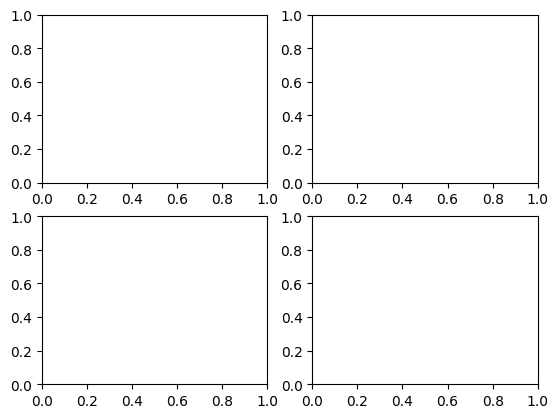

In [33]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1) 
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

In [34]:
category_names1 =da1.columns.values.tolist() 
category_names1

['Bacteroidales',
 'Enterobacterales',
 'Clostridiales',
 'Neisseriales',
 'Lactobacillales',
 'Bacillales',
 'Veillonellales',
 'Actinomycetales',
 'Campylobacterales',
 'Flavobacteriales',
 'Pseudomonadales',
 'Tissierellales',
 'Rhizobiales',
 'Others']

In [35]:
results1= da1.T.to_dict('list') 
results1

{'HC-3-pre': [0.3280716982190892,
  0.0,
  0.13611352264308565,
  0.03354316338391853,
  0.0035566523594144847,
  0.07035015468956365,
  0.020732418237833967,
  0.16854851327121326,
  0.029508023747847133,
  0.023309924997896993,
  0.005151754978077927,
  0.014765268655544344,
  0.0,
  0.16634890481651476],
 'HC-2-pre': [0.279798606592987,
  0.0005135467711359116,
  0.10409422167656104,
  0.12040501818613114,
  0.001660465593430042,
  0.0401102130386533,
  0.07395158601005128,
  0.054250263055013126,
  0.043416976783576006,
  0.029577053445076273,
  0.03830425517623648,
  0.012419303797413768,
  0.0,
  0.20149848987373453],
 'HC-1-pre': [0.18856783999271481,
  6.404093680862092e-05,
  0.11303346495928832,
  0.09807240875997753,
  0.015941804301184016,
  0.3503486417658425,
  0.03870973266038929,
  0.027476191820308176,
  0.01261801328587739,
  0.024161972023509375,
  0.004640083618993606,
  0.006232949946679042,
  0.005843004708319508,
  0.11428985122010782]}

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5648\1402670827.py:44: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5648\1402670827.py:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5648\1402670827.py:74: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5648\1402670827.py:93: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


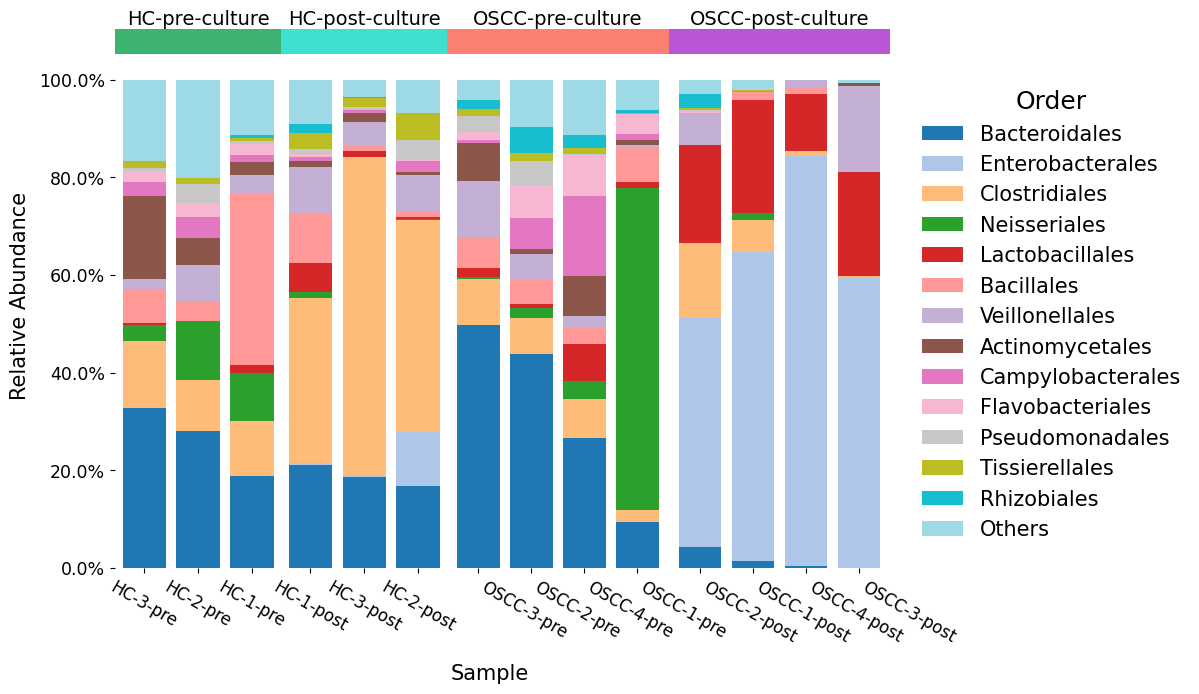

In [36]:
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
fig = plt.figure(1)
gs = GridSpec(2, 14, height_ratios=[0.05, 0.98], figure=fig)
# 创建子图  
ax0 = plt.subplot(gs[0, :])          # 第一行，占据所有14列  
ax1 = plt.subplot(gs[1, 0:3])        # 第二行，前3列  
ax2 = plt.subplot(gs[1, 3:6])        # 第二行，第4到6列  
ax3 = plt.subplot(gs[1, 6:10])       # 第二行，第7到10列  
ax4 = plt.subplot(gs[1, 10:14])      # 第二行，第11到14列  
# 分组标签及其颜色
groups = ['HC-pre-culture', 'HC-post-culture', 'OSCC-pre-culture', 'OSCC-post-culture']
group_colors = ['mediumseagreen',  'turquoise', 'salmon','mediumorchid']
group_sizes = [3, 3, 4, 4]  # 每个分组中的样本数

ax0.set_xlim(0, sum(group_sizes))
ax0.set_ylim(0, 1)
start = 0
for color, size in zip(group_colors, group_sizes):
    ax0.barh(0.5, size, left=start, height=1, color=color)
    start += size
ax0.axis('off')

start = 0
for group, size in zip(groups, group_sizes):
    center = start + size / 2
    ax0.text(center, 1.4, group, ha='center', va='center', fontsize=14)
    start += size

labels1 = list(results1.keys())
datam1 = np.array(list(results1.values()))
data_cum1 = datam1.cumsum(axis=1) 
category_colors1 = plt.get_cmap('tab20')(np.linspace(0,1, datam1.shape[1]))
for i, (colname, color) in enumerate(zip(category_names1, category_colors1)):
    heights1 = datam1[:, i]
    starts1 = (data_cum1[:, i] - heights1)
    ax1.bar(labels1, heights1, bottom=starts1, width=0.8,label=colname, color=color)
max_height1 = datam1.max()  # Get the maximum height among all bars


for tick in ax1.get_xticklabels():
    tick.set_fontsize(12)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()
category_names2 =da2.columns.values.tolist() 
results2= da2.T.to_dict('list') 
labels2 = list(results2.keys())
datam2 = np.array(list(results2.values()))
data_cum2 = datam2.cumsum(axis=1) 
category_colors2 = plt.get_cmap('tab20')(np.linspace(0,1, datam2.shape[1]))
for i, (colname, color) in enumerate(zip(category_names2, category_colors2)):
    heights2 = datam2[:, i]
    starts2 = (data_cum2[:, i] - heights2)
    ax2.bar(labels2, heights2, bottom=starts2, width=0.8,label=colname, color=color)
for tick in ax2.get_xticklabels():
    tick.set_fontsize(12)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()

category_names3 =da3.columns.values.tolist() 
results3= da3.T.to_dict('list') 
labels3 = list(results3.keys())
datam3 = np.array(list(results3.values()))
data_cum3 = datam3.cumsum(axis=1) 
category_colors3 = plt.get_cmap('tab20')(np.linspace(0,1, datam3.shape[1]))
for i, (colname, color) in enumerate(zip(category_names3, category_colors3)):
    heights3 = datam3[:, i]
    starts3 = (data_cum3[:, i] - heights3)
    ax3.bar(labels3, heights3, bottom=starts3, width=0.8,label=colname, color=color)
for tick in ax3.get_xticklabels():
    tick.set_fontsize(12)

ax3.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()

category_names4 =da4.columns.values.tolist() 
results4= da4.T.to_dict('list') 
labels4 = list(results4.keys())
datam4 = np.array(list(results4.values()))
data_cum4 = datam4.cumsum(axis=1) 
category_colors4 = plt.get_cmap('tab20')(np.linspace(0,1, datam4.shape[1]))
for i, (colname, color) in enumerate(zip(category_names4, category_colors4)):
    heights4 = datam4[:, i]
    starts4 = (data_cum4[:, i] - heights4)
    ax4.bar(labels4, heights4, bottom=starts4, width=0.8,label=colname, color=color)
for tick in ax4.get_xticklabels():
    tick.set_fontsize(12)
#横坐标标题sample变大居中
fig.text(0.5, -0.05, 'Sample', ha='center', fontsize=15)
#纵坐标标题Relative Abundance变大
fig.text(0.02, 0.5, 'Relative Abundance', va='center', rotation='vertical', fontsize=15)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()
lines, labels = fig.axes[-1].get_legend_handles_labels()
#y轴坐标字体变大
ax1.tick_params(axis='y', labelsize=12.5) 
#将ax3纵坐标的100.0%对齐到ax1的纵坐标的100.0%
ax1.set_ylim(ax3.get_ylim())
ax2.set_ylim(ax3.get_ylim())
ax4.set_ylim(ax3.get_ylim())
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)
#去除ax2的纵坐标数值
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])

fig.legend(lines, labels, frameon=False,bbox_to_anchor=(1.21,0.82),prop = {'size':15},title='Order',title_fontsize='18',fontsize='12.5')


#增加每个子图的横向大小
fig.set_size_inches(10, 7)
# 调整子图之间的间距  
plt.subplots_adjust(wspace=0.0, hspace=0.1)  # hspace 设置为 0.3，根据需要调整  
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-30)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-30)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=-30,ha='left')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=-30,ha='left')

for ax in [ax1, ax2, ax3, ax4]:
    for spine in ax.spines.values():
        spine.set_visible(False)
#保存为pdf格式
plt.savefig('Order3.pdf',dpi=300,bbox_inches='tight')
plt.show()